In [1]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy.ma as ma
import astropy.units as u
from astropy.io import ascii
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
from astropy.stats import sigma_clipped_stats, sigma_clip
import subprocess

## Mag vs. Mag_error plots

In [2]:
#Read in all the csv files
os.chdir('NGC6791')
#g-band
g_10= pd.read_csv('g-10.csv', header=None)
g_40= pd.read_csv('g-40.csv', header=None)
g_120= pd.read_csv('g-120.csv', header=None)
g_240= pd.read_csv('g-240.csv', header=None)

#r-band
r_10= pd.read_csv('r-10.csv', header=None)
r_40= pd.read_csv('r-40.csv', header=None)
r_120= pd.read_csv('r-120.csv', header=None)
r_240= pd.read_csv('r-240.csv', header=None)

#i-band
i_10= pd.read_csv('i-10.csv', header=None)
i_40= pd.read_csv('i-40.csv', header=None)
i_120= pd.read_csv('i-120.csv', header=None)
i_240= pd.read_csv('i-240.csv', header=None)

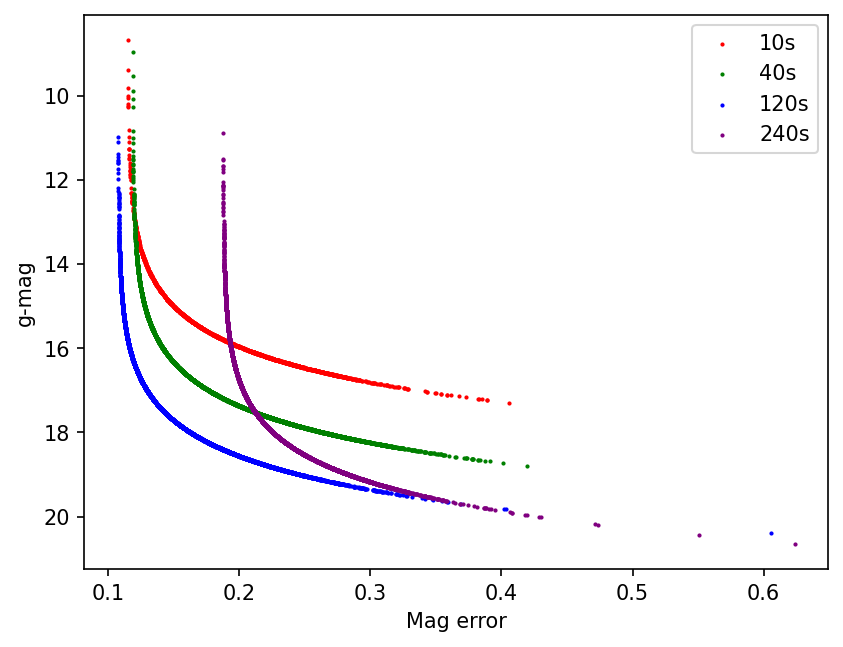

In [3]:
plt.figure(dpi=150)

colors = ['red', 'green', 'blue', 'purple']
size=1

# Plot each scatter plot with different colors and marker size
plt.scatter(np.array(g_10)[:,3], np.array(g_10)[:,2], s=size, color=colors[0], label='10s')
plt.scatter(np.array(g_40)[:,3], np.array(g_40)[:,2], s=size, color=colors[1], label='40s')
plt.scatter(np.array(g_120)[:,3], np.array(g_120)[:,2], s=size, color=colors[2], label='120s')
plt.scatter(np.array(g_240)[:,3], np.array(g_240)[:,2], s=size, color=colors[3], label='240s')

plt.gca().invert_yaxis()

plt.xlabel('Mag error')
plt.ylabel('g-mag')

plt.legend()
plt.savefig('mag_error.png')

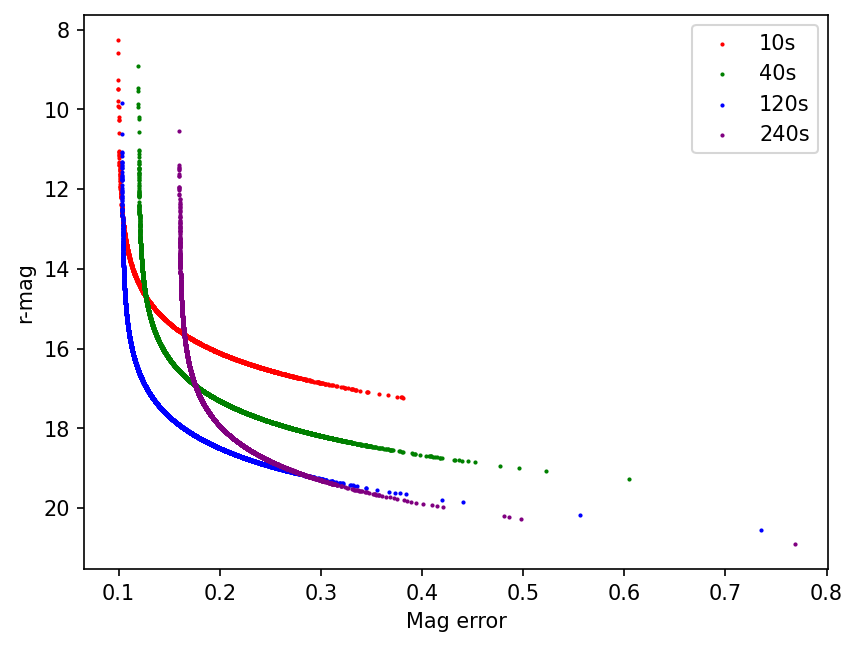

In [4]:
plt.figure(dpi=150)

colors = ['red', 'green', 'blue', 'purple']
size=1

# Plot each scatter plot with different colors and marker size
plt.scatter(np.array(r_10)[:,3], np.array(r_10)[:,2], s=size, color=colors[0], label='10s')
plt.scatter(np.array(r_40)[:,3], np.array(r_40)[:,2], s=size, color=colors[1], label='40s')
plt.scatter(np.array(r_120)[:,3], np.array(r_120)[:,2], s=size, color=colors[2], label='120s')
plt.scatter(np.array(r_240)[:,3], np.array(r_240)[:,2], s=size, color=colors[3], label='240s')

plt.gca().invert_yaxis()

plt.xlabel('Mag error')
plt.ylabel('r-mag')

plt.legend()

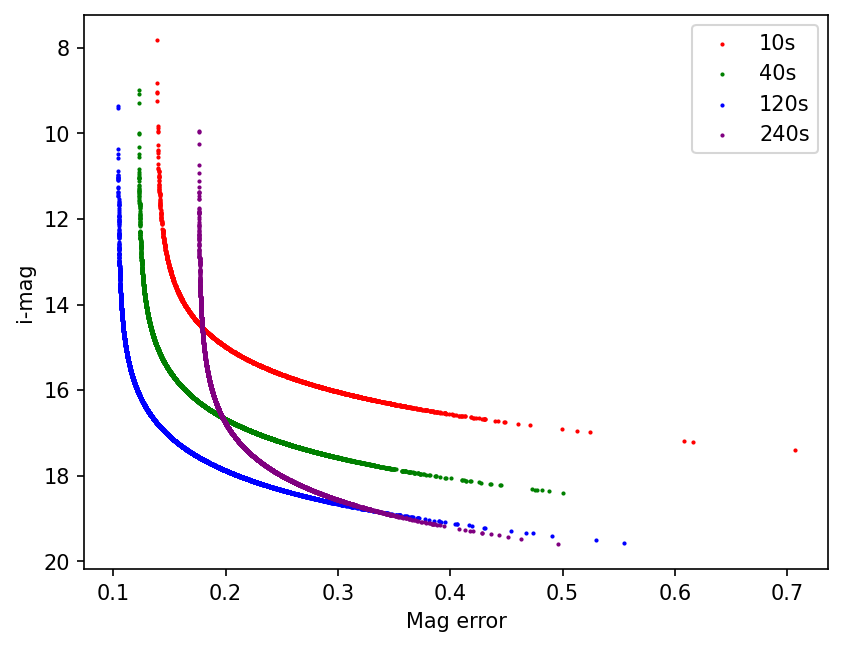

In [25]:
plt.figure(dpi=150)

colors = ['red', 'green', 'blue', 'purple']
size=1

# Plot each scatter plot with different colors and marker size
plt.scatter(np.array(i_10)[:,3], np.array(i_10)[:,2], s=size, color=colors[0], label='10s')
plt.scatter(np.array(i_40)[:,3], np.array(i_40)[:,2], s=size, color=colors[1], label='40s')
plt.scatter(np.array(i_120)[:,3], np.array(i_120)[:,2], s=size, color=colors[2], label='120s')
plt.scatter(np.array(i_240)[:,3], np.array(i_240)[:,2], s=size, color=colors[3], label='240s')

plt.gca().invert_yaxis()

plt.xlabel('Mag error')
plt.ylabel('i-mag')

plt.legend()
plt.savefig('mag_error.png')

## Combining magnitudes obtained from different exposure times

## Method 1

### g-band magnitudes

In [6]:
#Get the sky coordinates of all the sources detected in the different exposure times
g_10_coords= SkyCoord(ra=g_10.iloc[:,0], dec=g_10.iloc[:,1], frame='icrs', unit='degree')
g_40_coords= SkyCoord(ra=g_40.iloc[:,0], dec=g_40.iloc[:,1], frame='icrs', unit='degree')
g_120_coords= SkyCoord(ra=g_120.iloc[:,0], dec=g_120.iloc[:,1], frame='icrs', unit='degree')
g_240_coords= SkyCoord(ra=g_240.iloc[:,0], dec=g_240.iloc[:,1], frame='icrs', unit='degree')

In [7]:
#Now cross match sources

#Set the cross-match distance threshold to 0.7 arcsec, or just about one pixel
photoDistThresh = 0.7
idx_g_10, idx_g_40a, d2d, d3d = g_40_coords.search_around_sky(g_10_coords, photoDistThresh*u.arcsec)
#idx_g_40 are indexes into g_40_coords for the matched sources, while idx_g_10 are indexes into g_10_coords for the matched sources

idx_g_40b, idx_g_120a, d2d, d3d = g_120_coords.search_around_sky(g_40_coords, photoDistThresh*u.arcsec)
idx_g_120b, idx_g_240, d2d, d3d = g_240_coords.search_around_sky(g_120_coords, photoDistThresh*u.arcsec)
print('Found %d good cross-matches'%len(idx_g_40a))
print('Found %d good cross-matches'%len(idx_g_40b))
print('Found %d good cross-matches'%len(idx_g_120b))

Found 1272 good cross-matches
Found 3230 good cross-matches
Found 3196 good cross-matches


In [8]:
#concatenate the data frames such that those sources that show up in lower exposure images are chosen
g_list= pd.concat([g_240, g_120[~g_120.index.isin(idx_g_120b)], g_40[~g_40.index.isin(idx_g_40b)], g_10[~g_10.index.isin(idx_g_10)]], ignore_index=True)
g_list.shape

(7428, 4)

## r-band magnitudes

In [9]:
#Get the sky coordinates of all the sources detected in the different exposure times
r_10_coords= SkyCoord(ra=r_10.iloc[:,0], dec=r_10.iloc[:,1], frame='icrs', unit='degree')
r_40_coords= SkyCoord(ra=r_40.iloc[:,0], dec=r_40.iloc[:,1], frame='icrs', unit='degree')
r_120_coords= SkyCoord(ra=r_120.iloc[:,0], dec=r_120.iloc[:,1], frame='icrs', unit='degree')
r_240_coords= SkyCoord(ra=r_240.iloc[:,0], dec=r_240.iloc[:,1], frame='icrs', unit='degree')

In [10]:
#Now cross match sources

#Set the cross-match distance threshold to 0.7 arcsec, or just about one pixel
photoDistThresh = 0.7
idx_r_10, idx_r_40a, d2d, d3d = r_40_coords.search_around_sky(r_10_coords, photoDistThresh*u.arcsec)
#idx_g_40 are indexes into g_40_coords for the matched sources, while idx_g_10 are indexes into g_10_coords for the matched sources

idx_r_40b, idx_r_120a, d2d, d3d = r_120_coords.search_around_sky(r_40_coords, photoDistThresh*u.arcsec)
idx_r_120b, idx_r_240, d2d, d3d = r_240_coords.search_around_sky(r_120_coords, photoDistThresh*u.arcsec)
print('Found %d good cross-matches'%len(idx_r_40a))
print('Found %d good cross-matches'%len(idx_r_40b))
print('Found %d good cross-matches'%len(idx_r_120b))

Found 1857 good cross-matches
Found 4327 good cross-matches
Found 1161 good cross-matches


In [11]:
#concatenate the data frames such that those sources that show up in lower exposure images are chosen
r_list= pd.concat([r_240, r_120[~r_120.index.isin(idx_r_120b)], r_40[~r_40.index.isin(idx_r_40b)], r_10[~r_10.index.isin(idx_r_10)]], ignore_index=True)
r_list.shape

(11518, 4)

### i-band magnitudes

In [12]:
#Get the sky coordinates of all the sources detected in the different exposure times
i_10_coords= SkyCoord(ra=i_10.iloc[:,0], dec=i_10.iloc[:,1], frame='icrs', unit='degree')
i_40_coords= SkyCoord(ra=i_40.iloc[:,0], dec=i_40.iloc[:,1], frame='icrs', unit='degree')
i_120_coords= SkyCoord(ra=i_120.iloc[:,0], dec=i_120.iloc[:,1], frame='icrs', unit='degree')
i_240_coords= SkyCoord(ra=i_240.iloc[:,0], dec=i_240.iloc[:,1], frame='icrs', unit='degree')

In [13]:
#Now cross match sources

#Set the cross-match distance threshold to 0.7 arcsec, or just about one pixel
photoDistThresh = 0.7
idx_i_10, idx_i_40a, d2d, d3d = i_40_coords.search_around_sky(i_10_coords, photoDistThresh*u.arcsec)
#idx_i_40 are indexes into i_40_coords for the matched sources, while idx_i_10 are indexes into i_10_coords for the matched sources

idx_i_40b, idx_i_120a, d2d, d3d = i_120_coords.search_around_sky(i_40_coords, photoDistThresh*u.arcsec)
idx_i_120b, idx_i_240, d2d, d3d = i_240_coords.search_around_sky(i_120_coords, photoDistThresh*u.arcsec)
print('Found %d good cross-matches'%len(idx_i_40a))
print('Found %d good cross-matches'%len(idx_i_40b))
print('Found %d good cross-matches'%len(idx_i_120b))

Found 617 good cross-matches
Found 3972 good cross-matches
Found 1308 good cross-matches


In [14]:
#concatenate the data frames such that those sources that show up in lower exposure images are chosen
i_list= pd.concat([i_240, i_120[~i_120.index.isin(idx_i_120b)], i_40[~i_40.index.isin(idx_i_40b)], i_10[~i_10.index.isin(idx_i_10)]], ignore_index=True)
i_list.shape

(12041, 4)

## Method 2 from error plot

In [15]:
#g_list= pd.concat([g_10[g_10.iloc[:, 2] < 12], g_40[(g_40.iloc[:, 2] < 14) &  (g_40.iloc[:, 2] > 12)], g_120[(g_120.iloc[:, 2] < 15) & (g_120.iloc[:, 2] > 14)], g_240[g_240.iloc[:, 2] > 15]], ignore_index=True)
#r_list= pd.concat([r_10[r_10.iloc[:, 2] < 10], r_40[(r_40.iloc[:, 2] < 12 ) & (r_40.iloc[:, 2] > 10)], r_120[(r_120.iloc[:, 2] < 14) & (r_120.iloc[:, 2] > 12)], r_240[r_240.iloc[:, 2] > 14]], ignore_index=True)
#i_list= pd.concat([i_10[i_10.iloc[:, 2] < 10], i_40[(i_40.iloc[:, 2] < 12) & (i_40.iloc[:, 2] > 10)], i_120[(i_120.iloc[:, 2] < 14) & (i_120.iloc[:, 2] > 12)], i_240[i_240.iloc[:, 2] > 14]], ignore_index=True)

## Obtaining stars that have both g-band and i-band magnitudes

In [16]:
#Get the sky coordinates of all the sources in g, r, i bands
g_coords= SkyCoord(ra=g_list.iloc[:,0], dec=g_list.iloc[:,1], frame='icrs', unit='degree')
r_coords= SkyCoord(ra=r_list.iloc[:,0], dec=r_list.iloc[:,1], frame='icrs', unit='degree')
i_coords= SkyCoord(ra=i_list.iloc[:,0], dec=i_list.iloc[:,1], frame='icrs', unit='degree')

In [17]:
#Now cross match sources

#Set the cross-match distance threshold to 0.6 arcsec, or just about one pixel
photoDistThresh = 0.7

# find matches between set1 and set2
idx_setr, idx_setg, d2d, d3d = g_coords.search_around_sky(r_coords, photoDistThresh*u.arcsec)

g_match=g_list.loc[idx_setg]
r_match=r_list.loc[idx_setr]

g_match = g_match.reset_index(drop=True)
r_match = r_match.reset_index(drop=True)

# find matches between set1-set2 and set3
g_coords= SkyCoord(ra=g_match.iloc[:,0], dec=g_match.iloc[:,1], frame='icrs', unit='degree')

idx_seti, idx_setg2, d2d, d3d = g_coords.search_around_sky(i_coords, photoDistThresh*u.arcsec)

g_final= g_match.loc[idx_setg2]
r_final= r_match.loc[idx_setg2]
i_final= i_list.loc[idx_seti]

print(len(g_final), len(r_final), len(i_final))

6321 6321 6321


In [18]:
headers = ["RA", "DEC", "gmag", "rmag", "imag", "imag_error"]
source_catalog= pd.DataFrame(columns=headers)

source_catalog["RA"]= g_final.iloc[:,0]
source_catalog["DEC"]= g_final.iloc[:,1]
source_catalog["gmag"]= g_final.iloc[:,2].values
source_catalog["rmag"]= r_final.iloc[:,2].values
source_catalog["imag"]= i_final.iloc[:,2].values
source_catalog["imag_error"]= i_final.iloc[:,3].values

In [19]:
source_catalog = source_catalog.reset_index(drop=True)
source_catalog.head

<bound method NDFrame.head of               RA        DEC       gmag       rmag       imag  imag_error
0     290.037505  37.550652  17.179756  16.610941  17.002600    0.205593
1     289.899769  37.603963  16.577889  15.897231  16.190962    0.190109
2     289.972884  37.582235  14.770265  13.609842  13.914464    0.177887
3     290.058627  37.547716  17.076898  16.015980  16.207089    0.190299
4     290.158129  37.514469  18.641769  18.004383  18.342931    0.276990
...          ...        ...        ...        ...        ...         ...
6316  290.427196  37.970449  15.556299  15.121394  15.112420    0.207724
6317  290.393216  37.911788  14.983533  14.589884  14.578618    0.181006
6318  290.225347  37.992184  17.402532  16.643845  16.048890    0.301962
6319  290.399527  37.962210  16.081603  15.174318  14.868500    0.193871
6320  290.152901  38.022541  16.822245  16.336342  16.397959    0.363239

[6321 rows x 6 columns]>

## Obtaining the HR diagram of NGC 6791

In [20]:
#Coordinates of the centre of NGC 6791
cluster_center= SkyCoord(ra=290.2208333, dec=37.7677778, unit='deg')

# Calculate the distance between each source and the fixed position
distances = cluster_center.separation(SkyCoord(ra=source_catalog['RA']*u.degree, dec=source_catalog['DEC']*u.degree, frame='icrs')).to(u.arcmin)

# Select the sources within a 10 arcmin radius
cluster_sources = source_catalog[distances <= 6.0*u.arcmin]

# Print the resulting DataFrame
print(len(cluster_sources))

1883


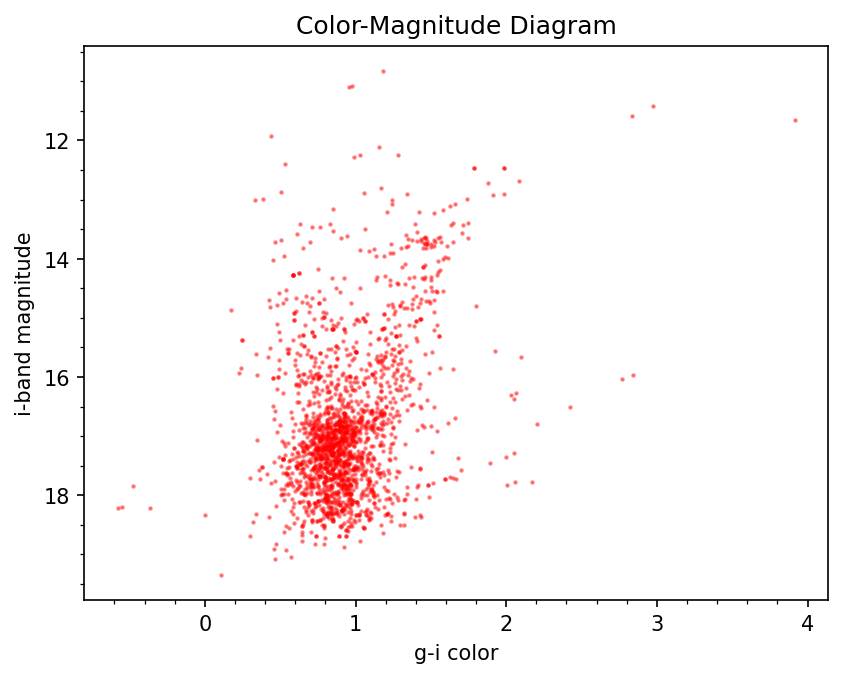

In [21]:
#Plotting
color= cluster_sources['gmag']- cluster_sources['imag']

# Plot the HR diagram
fig, ax = plt.subplots(dpi=150)
ax.scatter(color, cluster_sources['imag'], s=1.5, alpha=0.4, color='red')
ax.invert_yaxis()
ax.minorticks_on()
ax.set_xlabel('g-i color')
ax.set_ylabel('i-band magnitude')
ax.set_title('Color-Magnitude Diagram')
#ax.set_xlim(-2,10)
#ax.set_ylim(20,8)
plt.savefig('HR-gi.png')

## Distance calculation

In [22]:
i_trgb_abs= -3.44
trgb_values= cluster_sources[(color>2.6) & (color<3.2)]
i_trgb_app= min(trgb_values['imag'])
print(trgb_values)

d_pc= 10**((i_trgb_app-i_trgb_abs)/5 +1)
print('Distance to NGC 6791 is %d pc'%d_pc)

              RA        DEC       gmag       rmag       imag  imag_error
351   290.253034  37.696979  18.802537  17.559705  15.962921    0.187466
5403  290.253034  37.696979  18.802537  17.559705  16.035690    0.165609
5425  290.207105  37.728624  14.421148  13.194534  11.588484    0.123427
6216  290.316748  37.779642  14.395832  13.009857  11.424182    0.141312
Distance to NGC 6791 is 9393 pc


In [26]:
# Error in distance
dplus= 10**((i_trgb_app+ 0.241312-i_trgb_abs)/5 +1)
dminus= 10**((i_trgb_app- 0.241312-i_trgb_abs)/5 +1)

print('Error in Distance to NGC 6791 is %d pc'%abs(dplus-dminus))

Error in Distance to NGC 6791 is 2092 pc


## Background Contamination

In [24]:
#Coordinates of the centre of NGC 6791
background_center= SkyCoord(ra=290.5080996 , dec=37.7807081, unit='deg')

# Calculate the distance between each source and the fixed position
distances = background_center.separation(SkyCoord(ra=source_catalog['RA']*u.degree, dec=source_catalog['DEC']*u.degree, frame='icrs')).to(u.arcmin)

# Select the sources within a 10 arcmin radius
bg_sources = source_catalog[distances <= 6.0*u.arcmin]

# Print the resulting DataFrame
print(len(bg_sources))

588


~603 out of ~2000 sources in the cluster are contaminations from the background and hence add to the noise in the HR diagram